In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#FOnction d'étiquette de données

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))

In [6]:
data = pd.read_csv(r"E:\Machine Learning & Business Intelligence\Analyse de donnée - Supermarché\supermarket_sales.csv")
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<h1> 1- <u>Quel est le mois durant lequel nous avons realiser le meilleur chiffre ?</u></h1>

Mois
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64
Le plus haut chiffre d'affaire est  116291.868
Mois
1    5537.708
2    4629.494
3    5212.167
Name: Tax 5%, dtype: float64
Taxe par mois la plus elevé est  5537.708


Text(0.5, 1.0, 'Taxe par mois')

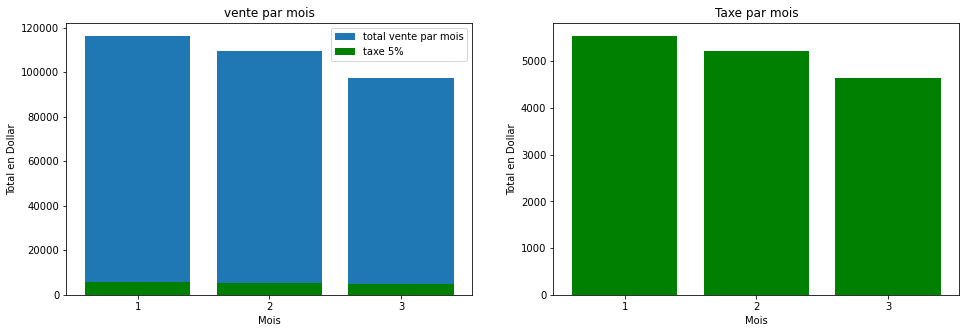

In [7]:
#pour realiser cela il faudra isoler le mois de la date qui est dans ['Order Date']
def mois(x) :
    return x.split('/')[0]
#mois('04/19/19 08:46') ==> ['04', '19', '19 08:46'] ----> sa c'est pour x.split('/')
data['Mois'] = data['Date'].apply(mois) #Ajout d'un champs mois creer a partir de la fonction mois
data['Mois'] = data['Mois'].astype(int)
mois = data['Mois'].unique() #---> liste des valeurs dans le champs mois en sql distinct, on constate qu'il y a 3 mois

#total vente par mois
total_par_mois = data.groupby('Mois')['Total'].sum()
#total taxe par mois
taxe_par_mois = data.groupby('Mois')['Tax 5%'].sum()


print(total_par_mois)
print("Le plus haut chiffre d'affaire est ",max(total_par_mois))

print(taxe_par_mois)
print("Taxe par mois la plus elevé est ",max(taxe_par_mois))




#graphique
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.bar(mois,total_par_mois, label="total vente par mois")
plt.bar(mois,taxe_par_mois, label="taxe 5%", color='g')
plt.xticks(mois) # pour faire apparaitre uniquement les valeur des mois
plt.xlabel('Mois')
plt.legend()
plt.ylabel('Total en Dollar')
plt.title("vente par mois")

plt.subplot(1,2,2)
plt.bar(mois,taxe_par_mois, color='g')
plt.xticks(mois) # pour faire apparaitre uniquement les valeur des mois
plt.xlabel('Mois')
plt.ylabel('Total en Dollar')
plt.title("Taxe par mois")


<h1> 2- <u>Digramme circulaire : <b>type de custemer</b> & <b>Payment</b></u></h1>

(-1.1280692997235047,
 1.1287329446408674,
 -1.1220052205156195,
 1.1109102350676414)

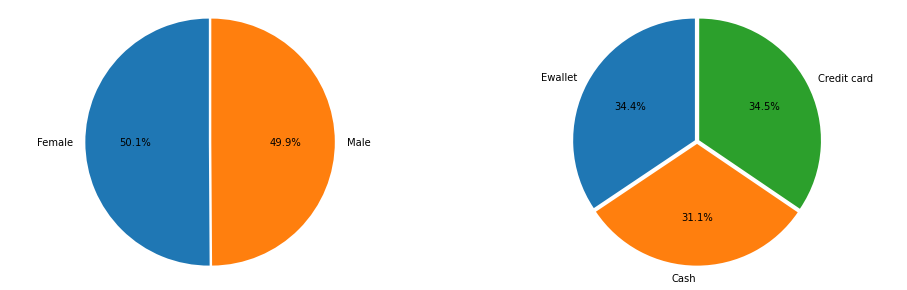

In [8]:
#nombre de personne par genre
genre = data['Gender'].unique()
data.groupby('Gender')['Gender'].count()

#nombre de payment
payment = data['Payment'].unique()
data.groupby('Payment')['Payment'].count()


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
labels = genre
sizes = data.groupby('Gender')['Gender'].count()
explode = (0, 0.02)
plt.pie(sizes, labels=labels,explode=explode ,autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')



plt.subplot(1,2,2)
explode = (0.02, 0.02, 0.02)
labels = payment
sizes = data.groupby('Payment')['Payment'].count()
plt.pie(sizes, labels=labels,explode=explode ,autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')



<h1> 3- <u>Chiffre d'affaire par produit</u></h1>

C:\Users\CARLEL~1\AppData\Local\Temp/ipykernel_968/3141609644.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


Text(0.5, 1.0, "chiffre d'affaire par poduit")

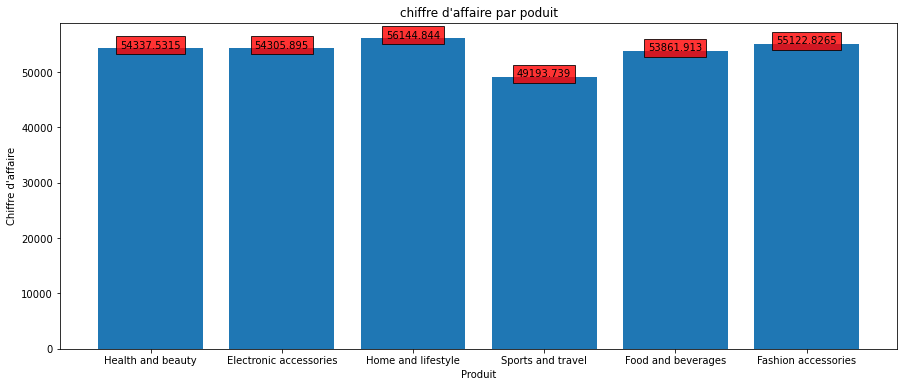

In [9]:
produit = data["Product line"].unique()
CA_par_prod = data.groupby('Product line')['Total'].sum()
      

plt.figure(figsize=(15, 6))
plt.bar(produit, CA_par_prod)
addlabels(produit, CA_par_prod)
plt.xticks(size="10")
plt.xlabel("Produit")
plt.ylabel("Chiffre d'affaire")
plt.title("chiffre d'affaire par poduit")

<h1> 4- <u>Chiffre d'affaire par produit par mois</u></h1>

In [10]:
produit = data["Product line"].unique()
data_par_prod_par_mois = data.groupby(['Mois','Product line']).sum()
data_par_prod_par_mois


Unit price  Quantity     Tax 5%       Total  \
Mois Product line                                                          
1    Electronic accessories     2950.21       333   896.7280  18831.2880   
     Fashion accessories        3543.65       336   921.1960  19345.1160   
     Food and beverages         3237.38       325   931.9300  19570.5300   
     Health and beauty          2857.81       254   780.1510  16383.1710   
     Home and lifestyle         3337.09       342   975.9400  20494.7400   
     Sports and travel          3827.75       375  1031.7630  21667.0230   
2    Electronic accessories     2938.94       313   826.8050  17362.9050   
     Fashion accessories        3716.89       295   905.2315  19009.8615   
     Food and beverages         3367.99       349   952.3980  20000.3580   
     Health and beauty          2486.34       266   695.3455  14602.2555   
     Home and lifestyle         2100.08       205   592.1135  12434.3835   
     Sports and travel          2549.28       226   657.6005  13809.6105   
3    Electronic accessories     3214.62       325   863.9685  18143.3385   
     Fashion accessories        2912.81       271   759.5675  15950.9175   
     Food and beverages         3140.17       278   789.2360  16573.9560   
     Health and beauty          2993.73       334   867.0625  18208.3125   
     Home and lifestyle         3413.54       364   996.7995  20932.7895   
     Sports and travel          3083.85       319   935.5330  19646.1930   

                                 cogs  gross margin percentage  gross income  \
Mois Product line                                                              
1    Electronic accessories  17934.56               257.142857      896.7280   
     Fashion accessories     18423.92               304.761905      921.1960   
     Food and beverages      18638.60               266.666667      931.9300   
     Health and beauty       15603.02               233.333333      780.1510   
     Home and lifestyle      19518.80               280.952381      975.9400   
     Sports and travel       20635.26               333.333333     1031.7630   
2    Electronic accessories  16536.10               257.142857      826.8050   
     Fashion accessories     18104.63               285.714286      905.2315   
     Food and beverages      19047.96               295.238095      952.3980   
     Health and beauty       13906.91               219.047619      695.3455   
     Home and lifestyle      11842.27               180.952381      592.1135   
     Sports and travel       13152.01               204.761905      657.6005   
3    Electronic accessories  17279.37               295.238095      863.9685   
     Fashion accessories     15191.35               257.142857      759.5675   
     Food and beverages      15784.72               266.666667      789.2360   
     Health and beauty       17341.25               271.428571      867.0625   
     Home and lifestyle      19935.99               300.000000      996.7995   
     Sports and travel       18710.66               252.380952      935.5330   

                             Rating  
Mois Product line                    
1    Electronic accessories   385.7  
     Fashion accessories      451.9  
     Food and beverages       414.7  
     Health and beauty        349.3  
     Home and lifestyle       393.7  
     Sports and travel        474.9  
2    Electronic accessories   376.1  
     Fashion accessories      424.9  
     Food and beverages       434.8  
     Health and beauty        331.5  
     Home and lifestyle       268.7  
     Sports and travel        306.6  
3    Electronic accessories   415.4  
     Fashion accessories      374.4  
     Food and beverages       388.2  
     Health and beauty        383.7  
     Home and lifestyle       431.6  
     Sports and travel        366.6

In [11]:
print(data_par_prod_par_mois['Total'][1]['Electronic accessories'])
print("\n mois 1")
print(data_par_prod_par_mois['Total'][1])

18831.288

 mois 1
Product line
Electronic accessories    18831.288
Fashion accessories       19345.116
Food and beverages        19570.530
Health and beauty         16383.171
Home and lifestyle        20494.740
Sports and travel         21667.023
Name: Total, dtype: float64


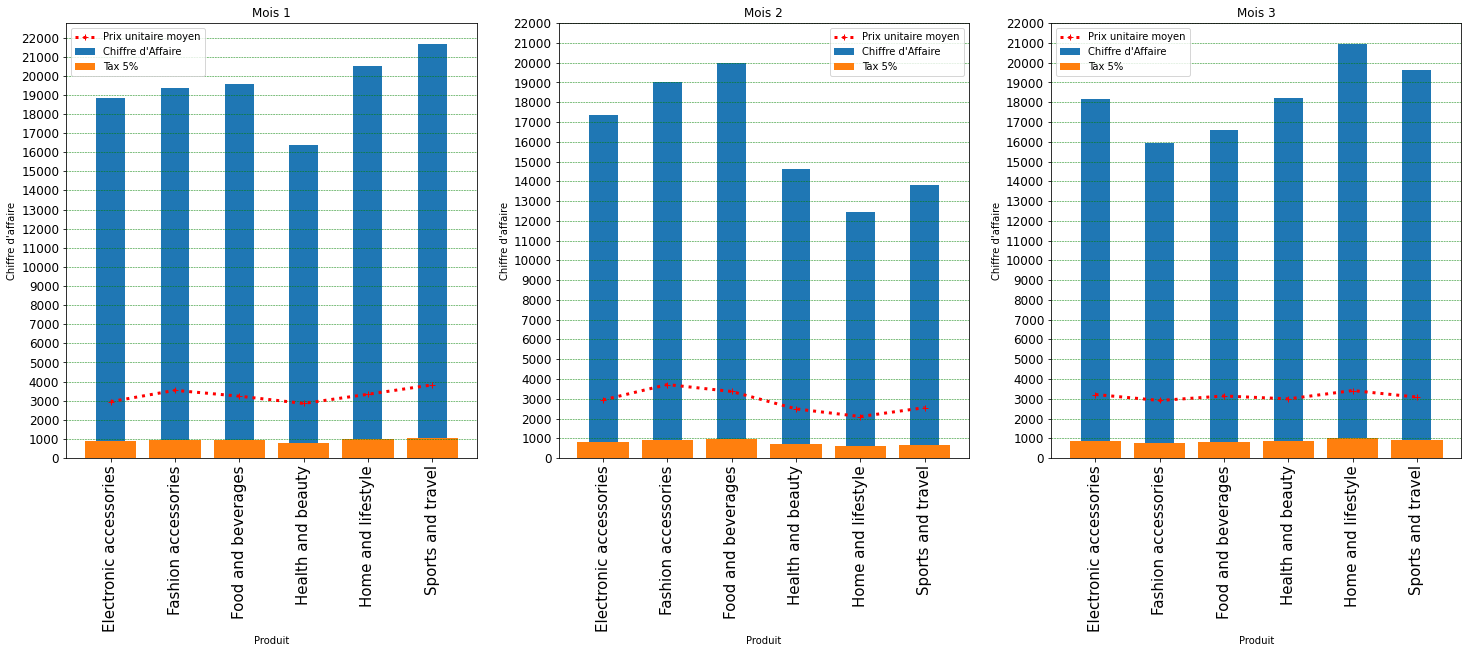

In [12]:
m = data['Mois'].unique()
pr = sorted(data["Product line"].unique()) # produit distint trier par ordre alphabetique
d = data.groupby('Product line')['Unit price'].mean() #moyenne prix unitaire par produit

plt.figure(figsize=(25, 8))
for i in m:
    data_par_prod_par_mois['Total'][i]
    data_par_prod_par_mois['Unit price'][i].mean()
    
    plt.subplot(1,3,i)
    plt.plot(pr, data_par_prod_par_mois['Unit price'][i], 'r+:', label = "Prix unitaire moyen", linewidth=3)
    plt.bar(pr, data_par_prod_par_mois['Total'][i], label="Chiffre d'Affaire", width=0.45)
    plt.bar(pr, data_par_prod_par_mois['Tax 5%'][i], label="Tax 5%")
    plt.legend()
    plt.grid(color='g', linestyle='--', linewidth=0.5, axis="y")
    plt.xticks(size="15", rotation='vertical')
    plt.yticks(size="12")
    plt.yticks(np.arange(0, 23000, 1000)) #---> pour l'échelle
    plt.xlabel("Produit")
    plt.ylabel("Chiffre d'affaire")
    plt.title(f"Mois {i}")

<h1> 5- <u>City avec le plus de vente</u></h1>

C:\Users\CARLEL~1\AppData\Local\Temp/ipykernel_968/3141609644.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

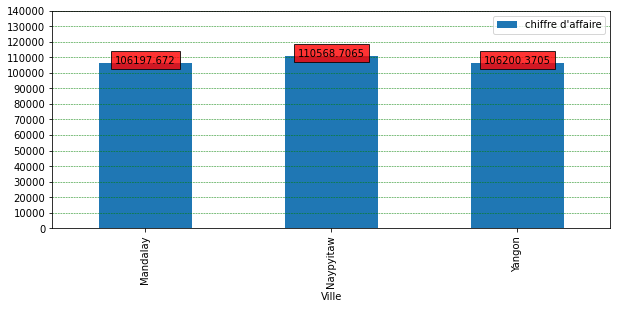

In [13]:
city = data.groupby('City')['Total'].sum()
nom_city = sorted(data['City'].unique())

plt.figure(figsize=(10,4))
city.plot(kind="bar", label="chiffre d'affaire")
plt.yticks(np.arange(0, 150000, 10000)) #---> pour l'échelle
plt.xlabel("Ville")
addlabels(nom_city, city)
plt.grid(color='g', linestyle='--', linewidth=0.5, axis="y")
plt.legend()
city

<h1> 6- <u>City avec le plus de vente par mois</u></h1>

In [14]:
nom_ville = sorted(data['City'].unique())
data_par_ville_par_mois = data.groupby(['Mois','City']).sum()
data_par_ville_par_mois

Unit price  Quantity     Tax 5%       Total      cogs  \
Mois City                                                               
1    Mandalay      6544.41       600  1770.2885  37176.0585  35405.77   
     Naypyitaw     6859.95       680  1925.4610  40434.6810  38509.22   
     Yangon        6349.53       685  1841.9585  38681.1285  36839.17   
2    Mandalay      5919.62       624  1639.2510  34424.2710  32785.02   
     Naypyitaw     5808.97       537  1568.3325  32934.9825  31366.65   
     Yangon        5430.93       493  1421.9105  29860.1205  28438.21   
3    Mandalay      6014.85       596  1647.4925  34597.3425  32949.85   
     Naypyitaw     5898.84       614  1771.3830  37199.0430  35427.66   
     Yangon        6845.03       681  1793.2915  37659.1215  35865.83   

                gross margin percentage  gross income  Rating  
Mois City                                                      
1    Mandalay                528.571429     1770.2885   755.0  
     Naypyitaw               580.952381     1925.4610   872.9  
     Yangon                  566.666667     1841.9585   842.3  
2    Mandalay                519.047619     1639.2510   763.9  
     Naypyitaw               476.190476     1568.3325   720.0  
     Yangon                  447.619048     1421.9105   658.7  
3    Mandalay                533.333333     1647.4925   744.7  
     Naypyitaw               504.761905     1771.3830   727.0  
     Yangon                  604.761905     1793.2915   888.2

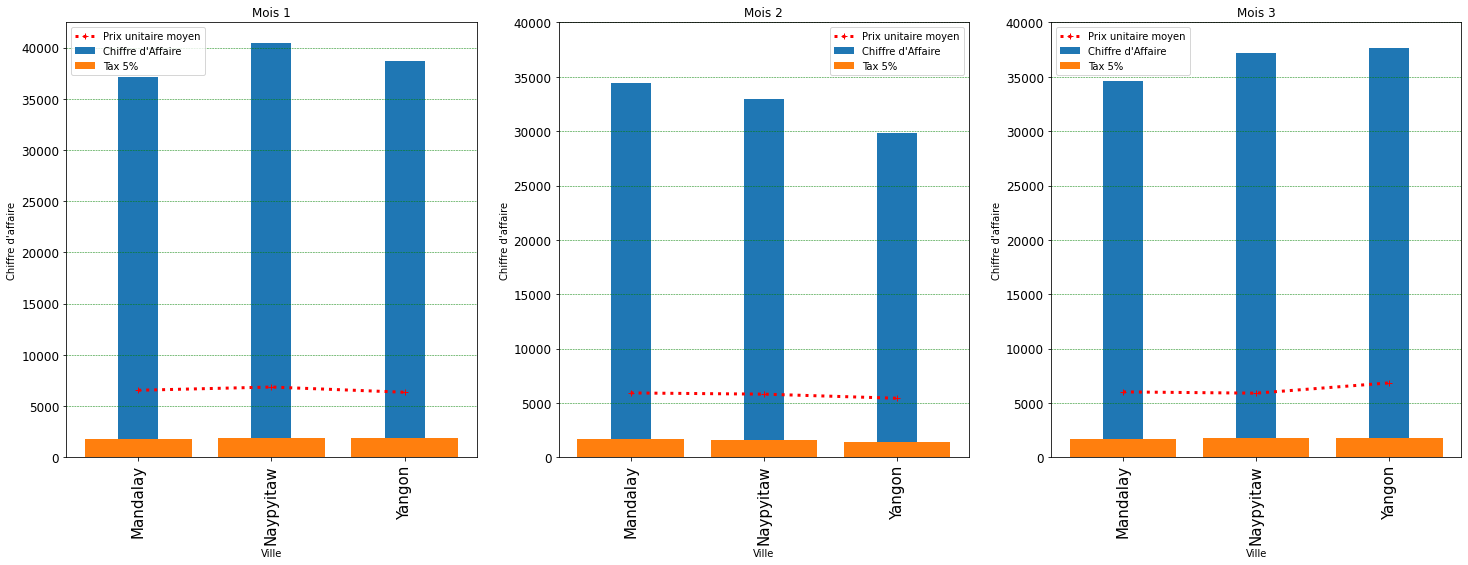

In [15]:
nbr_ville = data['City'].unique()

plt.figure(figsize=(25, 8))
for i in range(1, len(nbr_ville)+1):
    data_par_ville_par_mois['Total'][i]
    
    plt.subplot(1,3,i)
    plt.plot(nom_ville, data_par_ville_par_mois['Unit price'][i], 'r+:', label = "Prix unitaire moyen", linewidth=3)
    plt.bar(nom_ville, data_par_ville_par_mois['Total'][i], label="Chiffre d'Affaire", width=0.3)
    plt.bar(nom_ville, data_par_ville_par_mois['Tax 5%'][i], label="Tax 5%")
    plt.legend()
    plt.grid(color='g', linestyle='--', linewidth=0.5, axis="y")
    plt.xticks(size="15", rotation='vertical')
    plt.yticks(size="12")
    plt.yticks(np.arange(0, 45000, 5000)) #---> pour l'échelle
    plt.xlabel("Ville")
    plt.ylabel("Chiffre d'affaire")
    plt.title(f"Mois {i}")